# 二分类

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

获取数据

In [77]:
def getData():
    data=pd.read_csv('ex2data1.txt',header=None)
    x=np.array(data.iloc[:,0:-1])
    x=np.insert(x,0,np.ones(x.shape[0]),axis=1)
    
    y=np.array(data.iloc[:,-1])

    theta=np.array([0,0,0])
    return x,y,theta
x,y,theta=getData()

激活函数

In [78]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

激活函数的导数

In [79]:
def derivation_sigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))

计算二分类计算

In [80]:
def compute(x,theta):
    return sigmoid(x@theta)

代价函数

In [81]:
def cost(x,y,theta):
    hx=compute(x,theta)
    j=(-y*np.log(hx)-(1-y)*np.log(1-hx)).sum()/x.shape[0]
    return j,hx
    

梯度下降

In [82]:
def gradient_descent(hx,x,y):
    return np.sum((hx-y)[:,np.newaxis]*x,axis=0)

主函数，求解最小代价

In [83]:
def main(iterate,speed,x,y,theta):
    costs=[]
    for i in range(iterate):
        j,hx=cost(x,y,theta)
        costs.append(j)
        theta=theta-speed*gradient_descent(hx,x,y)
    plt.plot(costs)
    plt.show()
    return np.array(theta)

绘制边界

In [84]:
def decision_boundaries(theta,range_min,range_max):
    plt.scatter(x[:,1],x[:,2],c=y)
    nums=np.linspace(range_min,range_max,1000)
    label_1=[]
    label_2=[]
    for i in range(len(nums)):
        for j in range(len(nums)):
            z=np.array([1,nums[i],nums[j]]).T@theta
            if(z>0.499 and z<0.501):
                label_1.append(nums[i])
                label_2.append(nums[j])
    plt.scatter(label_1,label_2)
    plt.show()

无特征缩放下降10000代

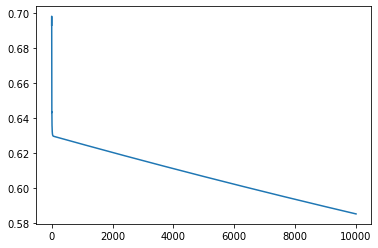

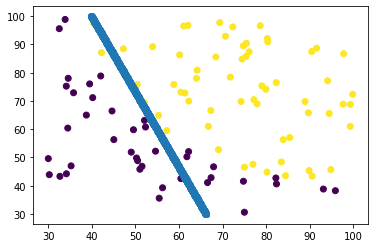

In [89]:
#没有特征缩放的时候很慢，跑了1000000才近似拟合
x,y,theta=getData()
theta=main(10000,0.00001,x,y,theta)
theta
decision_boundaries(theta,30,100)

归一化后下降1000代

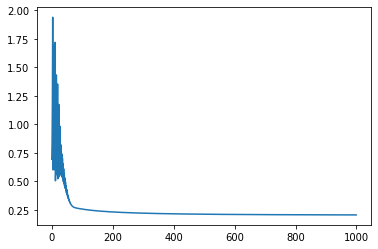

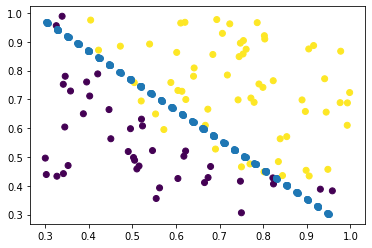

In [91]:
#归一化后，下降变快了
x,y,theta=getData()
x[:,1:]=x[:,1:]/100
theta=main(1000,0.08,x,y,theta)
decision_boundaries(theta,0.3,1)